In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data['species']=data['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
x=data.drop(['species'],axis=1)
y=data['species']
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 145    3
 146    3
 147    3
 148    3
 149    3
 Name: species, Length: 150, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train,y_train

(     sepal_length  sepal_width  petal_length  petal_width
 61            5.9          3.0           4.2          1.5
 92            5.8          2.6           4.0          1.2
 112           6.8          3.0           5.5          2.1
 2             4.7          3.2           1.3          0.2
 141           6.9          3.1           5.1          2.3
 ..            ...          ...           ...          ...
 9             4.9          3.1           1.5          0.1
 103           6.3          2.9           5.6          1.8
 67            5.8          2.7           4.1          1.0
 117           7.7          3.8           6.7          2.2
 47            4.6          3.2           1.4          0.2
 
 [112 rows x 4 columns],
 61     2
 92     2
 112    3
 2      1
 141    3
       ..
 9      1
 103    3
 67     2
 117    3
 47     1
 Name: species, Length: 112, dtype: int64)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train[0:10,:])

[[ 0.01543995 -0.11925475  0.22512685  0.35638175]
 [-0.09984503 -1.04039491  0.11355956 -0.02864805]
 [ 1.05300481 -0.11925475  0.95031423  1.12644135]
 [-1.36797986  0.34131533 -1.39259884 -1.31208072]
 [ 1.1682898   0.11103029  0.72717965  1.38312788]
 [-1.0221249   1.03217045 -1.2252479  -0.79870765]
 [-0.56098497  1.49274053 -1.28103155 -1.31208072]
 [-1.0221249  -2.42210516 -0.16535866 -0.28533458]
 [ 0.70714986 -0.11925475  0.95031423  0.74141155]
 [ 0.93771983  0.57160037  1.06188152  1.63981441]]


In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(multi_class='multinomial',solver='lbfgs')
classifier.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred=classifier.predict(x_test)
y_pred

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score,classification_report

In [14]:
score=accuracy_score(y_pred,y_test)
print(score)

0.9736842105263158


In [15]:
import seaborn as sns

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

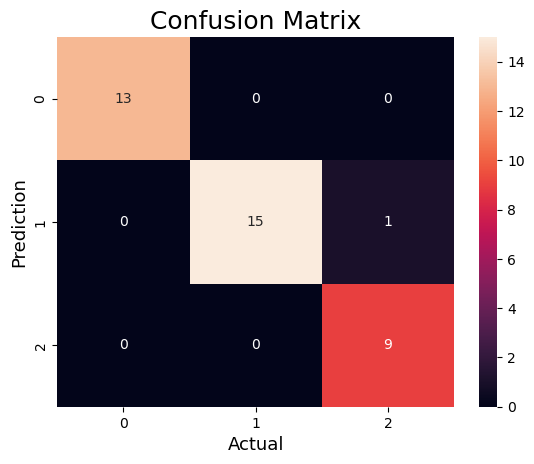

In [18]:
sns.heatmap(cm,
            annot=True,
            fmt='g' )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [19]:
from sklearn import datasets

C:\Users\ANKITA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


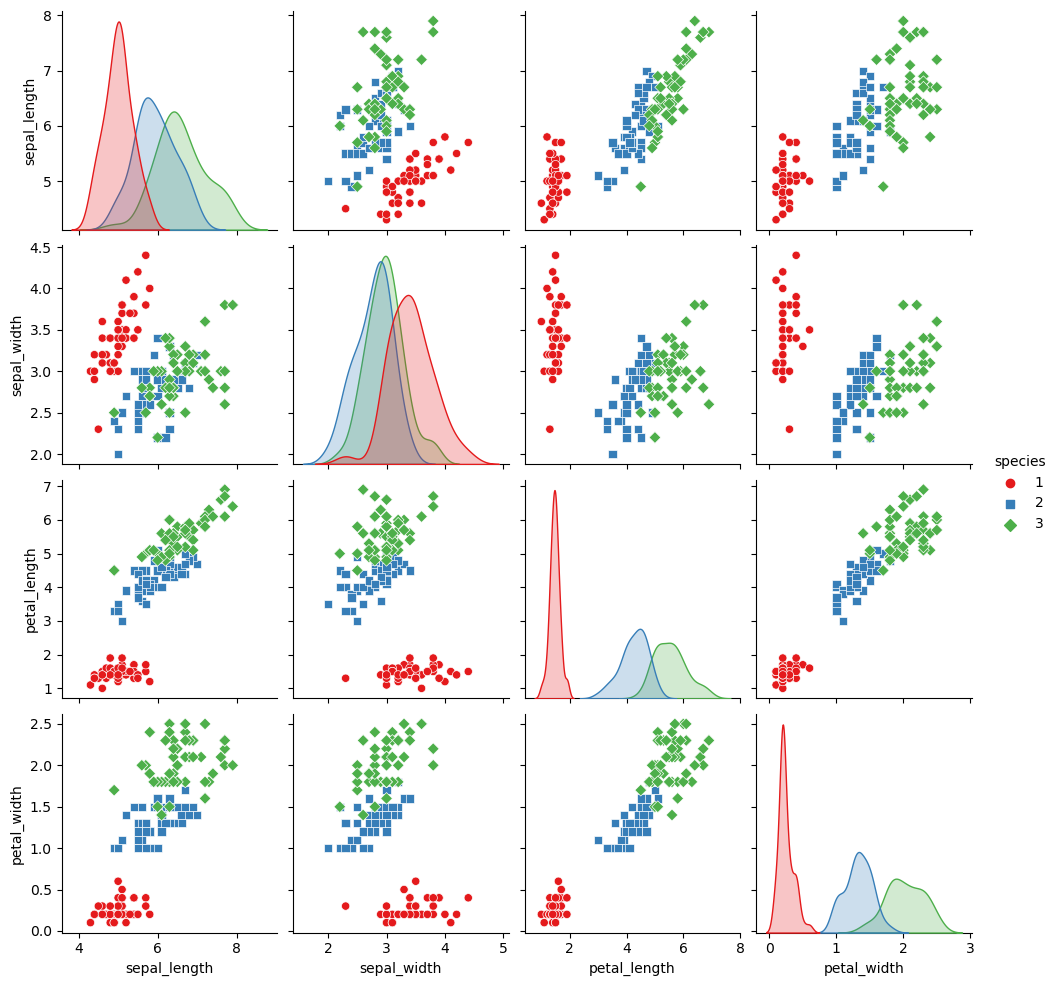

In [20]:
# Create a pairplot to visualize relationships between features
sns.pairplot(data, hue='species', markers=['o', 's', 'D'], palette='Set1')
plt.show()